In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 자연처리 프레임워크 및 라이브러리 설치하기

In [ ]:
# colab에 Mecab설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.


In [ ]:
%cd Mecab-ko-for-Google-Colab

/content/Mecab-ko-for-Google-Colab


In [ ]:
!bash install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4 MB 226 kB/s 
     |████████████████████████████████| 448 kB 58.5 MB/s 
     |████████████████████████████████| 86 kB 6.9 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-08-02 07:40:32--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::34cc:ea4a, 2406:da00:ff00::22c3:9b0a, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?Signature=K1XyoRFadih0xpxFiKN4i0zpW0c%3D&

In [ ]:
# 필요 프레임워크 및 라이브러리 준비
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Mecab
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/NLP_Classification/sentiment/Cleaned Dataset

/content/drive/MyDrive/Colab Notebooks/NLP_Classification/sentiment/Cleaned Dataset


# 데이터 로드

In [ ]:
# 사전에 정제+정규화된 훈련용 통합 데이터 로드
total_data = pd.read_table('clean_total_data(app&cosmetic&movie&shopping&game).txt')
print(len(total_data))
print(total_data[:5])

499643
                                            document  label
0                              첫 독립영화  그리고 독립영화에 빠지다      1
1  횡령죄가 아니라 배임죄인것 중요합니다 참고로 예금에서 인출한것이 배임이 아니라 협력...      1
2                                     는 기억할것입니다 응다죽어      0
3          괜히 샀다 나도 모르는사이 틀딱 감성 다 사라졌네 ㅋㅋ 추억보정이 부족하다      0
4  재구매 부모님과 할머니 맛있게 드시라고 보내드렸습니다 부모님이 저번에 보내드린것이 ...      1


In [ ]:
total_data_5X = pd.read_table('clean_total_data(app&cosmetic&movie&shopping&game)_5X.txt')
print(len(total_data_5X))
total_data_5X.head()

542151


,document,label
0,이 속바지를 왜 샀나싶네여 안장통땜에 샀는데 전혀 도움이 되지 않았구요 속바지 자체...,0
1,미친 여자가 분수에 발담그고 외계인과 대화하는 영화,0
2,요즘 참 인도 바라나시가 가고싶다 시바 인생을 던져 를 보고 나니 더욱 그렇다 한동...,1
3,탄막리듬겜 어렵지만 동체시력 기를땐 최고 노래도 짱이다 리게이는 필수 ㅋㅋ,1
4,맛있어요 저만 맛있는게 아닌가봐요 종종 물량 없어서 하루정도 배송 늦어질 때 있어요...,1


In [ ]:
total_data_10X = pd.read_table('clean_total_data(app&cosmetic&movie&shopping&game)_10X.txt')
print(len(total_data_10X))
total_data_10X.head()

595286


,document,label
0,잘먹고 있어요 또 구입할게요,1
1,정말 접착력은 최고입니다,1
2,이건 좀 제 입맛에는 별로였어요,0
3,아니 왜 실행안되요,0
4,여러 사람이 동시에 접속하여 의사소통 할 수 있는 점이 가장 마음에 든다 특히 해외...,1


# 토큰화

In [ ]:
# 불용어 정의 (한국어 조사, 접속사 등) 
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
# 훈련데이터에 형태소 분석기를 사용하여 토큰화를 하면서 불용어 제거
mecab = Mecab()
X_total = []
for sentence in total_data['document']:
    temp_X = mecab.morphs(sentence) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_total.append(temp_X)

In [ ]:
print(len(X_total))
print(X_total[:5])

499643
[['첫', '독립영화', '그리고', '독립영화', '빠지', '다'], ['횡령죄', '아니', '라', '배임죄', '인', '것', '중요', '합니다', '참고', '로', '예금', '에서', '인출', '것', '배임', '아니', '라', '협력', '무에', '위반', '했', '기', '때문', '배임', '입니다'], ['기억', '할', '것', '입니다', '응', '다', '죽', '어'], ['괜히', '샀', '다', '나', '모르', '사이', '틀', '딱', '감성', '다', '사라졌', '네', 'ㅋㅋ', '추억', '보정', '부족', '하', '다'], ['재', '구매', '부모', '님', '할머니', '맛있', '게', '드', '시', '라고', '보내', '드렸', '습니다', '부모', '님', '저번', '보내', '드린', '것', '너무', '맛있', '다고', '하', '셔셔', '할머니', '에게', '맛보', '여', '드리', '고자', '보내', '드렸', '어요', '포장', '꼼꼼', '하', '게', '해서', '보내', '주', '셔셔', '감사', '해요', '다음', '또', '구매', '해서', '보내', '드릴려고', '요', '많이', '파', '세요']]


In [ ]:
X_total_5X = []
for sentence in total_data_5X['document']:
    temp_X = mecab.morphs(sentence) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_total_5X.append(temp_X)
print(len(total_data_5X))
total_data_5X.head()

542151


,document,label
0,이 속바지를 왜 샀나싶네여 안장통땜에 샀는데 전혀 도움이 되지 않았구요 속바지 자체...,0
1,미친 여자가 분수에 발담그고 외계인과 대화하는 영화,0
2,요즘 참 인도 바라나시가 가고싶다 시바 인생을 던져 를 보고 나니 더욱 그렇다 한동...,1
3,탄막리듬겜 어렵지만 동체시력 기를땐 최고 노래도 짱이다 리게이는 필수 ㅋㅋ,1
4,맛있어요 저만 맛있는게 아닌가봐요 종종 물량 없어서 하루정도 배송 늦어질 때 있어요...,1


In [ ]:
X_total_10X = []
for sentence in total_data_10X['document']:
    temp_X = mecab.morphs(sentence) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_total_10X.append(temp_X)
print(len(total_data_10X))
total_data_10X.head()

595286


,document,label
0,잘먹고 있어요 또 구입할게요,1
1,정말 접착력은 최고입니다,1
2,이건 좀 제 입맛에는 별로였어요,0
3,아니 왜 실행안되요,0
4,여러 사람이 동시에 접속하여 의사소통 할 수 있는 점이 가장 마음에 든다 특히 해외...,1


# 정수 인코딩

In [ ]:
# 기계가 텍스트를 숫자로 처리할 수 있도록 데이터를 정수로 변환
# 일단 단어 집합을 만들자
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_total)
 # fit_on_texts()안에 코퍼스를 입력으로 하면 빈도수를 기준으로 단어 집합을 생성한다.
 # 단어 빈도수가 높은순으로 낮은 정수 인덱스 부여

In [ ]:
# 등장 빈도수가 낮은 데이터를 처리해보자
# 특정 횟수 이하 단어의 비중이 몇인지 체크
threshold = 41
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 90450
등장 빈도가 40번 이하인 희귀 단어의 수: 81214
단어 집합에서 희귀 단어의 비율: 89.78883360972914
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.92074879523072


In [ ]:
# 전체 단어 개수 중 빈도수 12이하인 단어는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 9237


In [ ]:
# 단어집합을 케라스 토크나이저의 인자로 넘겨주면, 케라스 토크나이저는 텍스트 시퀀스를 숫자 시퀀스로 변환
#Tokenizer메서드에 숫자를 입력하면 빈도수가 높은 상위 몇개 단어만 사용
tokenizer = Tokenizer(num_words = vocab_size +2, oov_token ='OOV')
# 빈도수 상위 vocab_size단어만 사용, 숫자 0과 OOV를 고려해서 단어 집합의 크기는 +2
tokenizer.fit_on_texts(X_total)
# 여기까지는 보캡길이가 적용안된 것처럼 보임, 실제 적용은 text_to_sequences사용시 적용됨
X_total = tokenizer.texts_to_sequences(X_total)

# vocab_size로 지정한 단어만 보존하고 싶을 때, 굳이 안해도됨
# words_frequency = [w for w,c in tokenizer.word_index.items() if c >= vocab_size + 1] # 인덱스가 5 초과인 단어 제거
# for w in words_frequency:
#     del tokenizer.word_index[w] # 해당 단어에 대한 인덱스 정보를 삭제
#     del tokenizer.word_counts[w] # 해당 단어에 대한 카운트 정보를 삭제

# 정수인코딩 결과 확인
print(len(tokenizer.word_index))
print(tokenizer.word_index)
print(tokenizer.word_counts)

# 빈도수 상위 vocabsize개수의 단어는 2 ~ vocabsize+1까지의 인덱스를 가졌으며, 그 외 단어 집합에 없는 단어들은 전부 'OOV'의 인덱스인 1로 인코딩
# 케라스 토크나이저는 기본적으로 'OOV'의 인덱스를 1로 지정
# print('단어 OOV의 인덱스 : {}'.format(tokenizer.word_index['OOV']))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
y_total = np.array(total_data['label'])

In [ ]:
tokenizer_5X = Tokenizer()
tokenizer_5X.fit_on_texts(X_total_5X)
tokenizer_5X = Tokenizer(num_words = vocab_size +2, oov_token ='OOV')
tokenizer_5X.fit_on_texts(X_total_5X)
X_total_5X = tokenizer_5X.texts_to_sequences(X_total_5X)
y_total_5X = np.array(total_data_5X['label'])

In [ ]:
tokenizer_10X = Tokenizer()
tokenizer_10X.fit_on_texts(X_total_10X)
tokenizer_10X = Tokenizer(num_words = vocab_size +2, oov_token ='OOV')
tokenizer_10X.fit_on_texts(X_total_10X)
X_total_10X = tokenizer_10X.texts_to_sequences(X_total_10X)
y_total_10X = np.array(total_data_10X['label'])

# 빈 샘플(empty samples)제거

In [ ]:
# 각 샘플의 길이가 0인 샘플들의 인덱스 확인
drop_total = [index for index, sentence in enumerate(X_total) if len(sentence) < 1]
print(drop_total)

[111, 153366, 207905, 324482, 328470, 337454, 364931, 385044, 401899, 449326, 453754, 471860, 495919]


In [ ]:
# 빈 샘플들을 제거
X_total = np.delete(X_total, drop_total, axis=0)
y_total = np.delete(y_total, drop_total, axis=0)
print(len(X_total))
print(len(y_total))

499630
499630


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
drop_total_5X = [index for index, sentence in enumerate(X_total_5X) if len(sentence) < 1]
X_total_5X = np.delete(X_total_5X, drop_total_5X, axis=0)
y_total_5X = np.delete(y_total_5X, drop_total_5X, axis=0)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
drop_total_10X = [index for index, sentence in enumerate(X_total_10X) if len(sentence) < 1]
X_total_10X = np.delete(X_total_10X, drop_total_10X, axis=0)
y_total_10X = np.delete(y_total_10X, drop_total_10X, axis=0)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


# 패딩

리뷰의 최대 길이 : 86
리뷰의 평균 길이 : 15.988749674759323


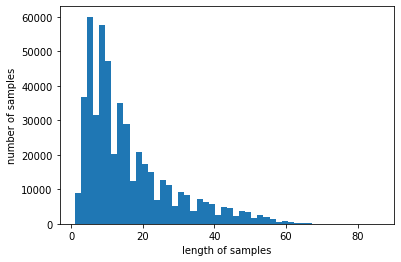

In [ ]:
# 서로 다른 길이의 샘플들의 길이를 동일하게 맞춰는 작업
# 전체 데이터에서 가장 길이가 긴 리뷰와, 전체의 길이분포를 알아보자
print('리뷰의 최대 길이 :',max(len(l) for l in X_total))
print('리뷰의 평균 길이 :',sum(map(len, X_total))/len(X_total))
plt.hist([len(s) for s in X_total], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
# 최적의 길이를 찾기 위해, 전체 샘플중 길이가 max_len 이하인 샘플의 비율을 확인하는 함수 생성
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [ ]:
# 비율 체크
max_len = 45
below_threshold_len(max_len, X_total)

전체 샘플 중 길이가 45 이하인 샘플의 비율: 96.18317554990693


In [ ]:
# 짧은 데이터는 0을 채우고, 기준을 넘는 데이터는 손실됨
X_total = pad_sequences(X_total, maxlen = max_len)

In [ ]:
print(len(X_total))
print(len(y_total))

499630
499630


In [ ]:
X_total_5X = pad_sequences(X_total_5X, maxlen = max_len)
X_total_10X = pad_sequences(X_total_10X, maxlen = max_len)

#  모델 훈련

In [ ]:
# 필요한 프레임워크 및 라이브러리 임포트
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense, Input, Flatten, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [ ]:
embedding_dim = 128
dropout_prob = (0.5, 0.8)
num_filters = 128

In [ ]:
model_input = Input(shape = (max_len,))
z = Embedding(vocab_size+2, embedding_dim, input_length = max_len, name="embedding")(model_input)
z = Dropout(dropout_prob[0])(z)

In [ ]:
conv_blocks = []

for sz in [3, 4, 5]:
    conv = Conv1D(filters = num_filters,
                         kernel_size = sz,
                         padding = "valid",
                         activation = "relu",
                         strides = 1)(z)
    conv = GlobalMaxPooling1D()(conv)
    conv = Flatten()(conv)
    conv_blocks.append(conv)

In [ ]:
# 필요한 매트릭 선언, AUC-ROC, F1-Score, AUC-PR 에 필요한 지표 모두 체크
import tensorflow as tf

ROCauc = tf.keras.metrics.AUC(curve="ROC") # auc_1
PRauc = tf.keras.metrics.AUC(curve="PR") # auc_2
RECALL = tf.keras.metrics.Recall()
PRECISION = tf.keras.metrics.Precision()
TP = tf.keras.metrics.TruePositives()
TN = tf.keras.metrics.TrueNegatives()
FP = tf.keras.metrics.FalsePositives()
FN = tf.keras.metrics.FalseNegatives()

In [ ]:
z = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
z = Dropout(dropout_prob[1])(z)
z = Dense(128, activation="relu")(z)
model_output = Dense(1, activation="sigmoid")(z)

model = Model(model_input, model_output)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['acc', ROCauc, PRauc, RECALL, PRECISION, TP, TN, FP, FN])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('9_CNN_1D_KoNLPy(Mecab)_Total(movie&shopping&game&target)_v0.2.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.fit(X_total, y_total, epochs=30, callbacks=[es, mc], batch_size = 100, validation_split=0.2)

Epoch 1/30
3998/3998 [==============================] - 103s 21ms/step - loss: 0.4012 - acc: 0.8179 - auc: 0.9000 - auc_1: 0.8982 - recall: 0.8121 - precision: 0.8244 - true_positives: 163742.0000 - true_negatives: 163195.0000 - false_positives: 34888.0000 - false_negatives: 37879.0000 - val_loss: 0.3521 - val_acc: 0.8506 - val_auc: 0.9272 - val_auc_1: 0.9237 - val_recall: 0.8552 - val_precision: 0.8485 - val_true_positives: 42916.0000 - val_true_negatives: 42082.0000 - val_false_positives: 7663.0000 - val_false_negatives: 7265.0000

Epoch 00001: val_acc improved from -inf to 0.85061, saving model to 9_CNN_1D_KoNLPy(Mecab)_Total((movie&shopping&game&target)_v0.2.h5
Epoch 2/30
3998/3998 [==============================] - 85s 21ms/step - loss: 0.3491 - acc: 0.8485 - auc: 0.9254 - auc_1: 0.9234 - recall: 0.8469 - precision: 0.8519 - true_positives: 170762.0000 - true_negatives: 168387.0000 - false_positives: 29696.0000 - false_negatives: 30859.0000 - val_loss: 0.3404 - val_acc: 0.8547 - v

In [ ]:
mc_5X = ModelCheckpoint('9_CNN_1D_KoNLPy(Mecab)_Total(movie&shopping&game&target5X)_v0.2.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
history = model.fit(X_total_5X, y_total_5X, epochs=30, callbacks=[es, mc_5X], batch_size=100, validation_split=0.2)

Epoch 1/30
4338/4338 [==============================] - 93s 21ms/step - loss: 0.5146 - acc: 0.7337 - auc: 0.8213 - auc_1: 0.8344 - recall: 0.7347 - precision: 0.7481 - true_positives: 165548.0000 - true_negatives: 152650.0000 - false_positives: 55738.0000 - false_negatives: 59774.0000 - val_loss: 0.4008 - val_acc: 0.8298 - val_auc: 0.9098 - val_auc_1: 0.9139 - val_recall: 0.8602 - val_precision: 0.8206 - val_true_positives: 48433.0000 - val_true_negatives: 41539.0000 - val_false_positives: 10585.0000 - val_false_negatives: 7871.0000

Epoch 00001: val_acc improved from -inf to 0.82979, saving model to 9_CNN_1D_KoNLPy(Mecab)_Total((movie&shopping&game&target5X)_v0.2.h5
Epoch 2/30
4338/4338 [==============================] - 92s 21ms/step - loss: 0.3786 - acc: 0.8330 - auc: 0.9117 - auc_1: 0.9143 - recall: 0.8361 - precision: 0.8416 - true_positives: 188382.0000 - true_negatives: 172919.0000 - false_positives: 35469.0000 - false_negatives: 36940.0000 - val_loss: 0.3636 - val_acc: 0.8475 -

In [ ]:
mc_10X = ModelCheckpoint('9_CNN_1D_KoNLPy(Mecab)_Total(movie&shopping&game&target10X)_v0.2.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
history = model.fit(X_total_10X, y_total_10X, epochs=30, callbacks=[es, mc_10X], batch_size=100, validation_split=0.2)

Epoch 1/30
4763/4763 [==============================] - 97s 20ms/step - loss: 0.6089 - acc: 0.6442 - auc: 0.7110 - auc_1: 0.7453 - recall: 0.7888 - precision: 0.6355 - true_positives: 201373.0000 - true_negatives: 105410.0000 - false_positives: 115514.0000 - false_negatives: 53921.0000 - val_loss: 0.4395 - val_acc: 0.8027 - val_auc: 0.8841 - val_auc_1: 0.8948 - val_recall: 0.8374 - val_precision: 0.8021 - val_true_positives: 53270.0000 - val_true_negatives: 42298.0000 - val_false_positives: 13145.0000 - val_false_negatives: 10342.0000

Epoch 00001: val_acc improved from -inf to 0.80272, saving model to 9_CNN_1D_KoNLPy(Mecab)_Total((movie&shopping&game&target10X)_v0.2.h5
Epoch 2/30
4763/4763 [==============================] - 96s 20ms/step - loss: 0.4206 - acc: 0.8098 - auc: 0.8899 - auc_1: 0.9010 - recall: 0.8298 - precision: 0.8181 - true_positives: 211855.0000 - true_negatives: 173809.0000 - false_positives: 47115.0000 - false_negatives: 43439.0000 - val_loss: 0.3722 - val_acc: 0.837

# 모델 성능평가(타겟데이터 기반)

In [ ]:
# 평가용 토탈 데이터셋2(화장품+앱)

# 데이터 로드
total_data2 = pd.read_table('clean_total_data(app&cosmetic).txt')

# 토크나이징
X_test_total2 = []
for sentence in total_data2['document']:
    temp_X2 = mecab.morphs(sentence)
    temp_X2 = [word for word in temp_X2 if not word in stopwords]
    X_test_total2.append(temp_X2)

# 워드 벡터화
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(X_test_total2)
X_test_total2 = tokenizer.texts_to_sequences(X_test_total2)

# 패딩
X_test_total2 = pad_sequences(X_test_total2, maxlen = max_len)

# 라벨데이터 포함
y_test_total2 = np.array(total_data2['label'])

In [ ]:
# 모델 성능 평가 
loaded_model = load_model('9_CNN_1D_KoNLPy(Mecab)_Total(movie&shopping&game&target)_v0.2.h5')
result = loaded_model.evaluate(X_test_total2, y_test_total2, batch_size=100)
print("\n 테스트 결과:",result)

107/107 [==============================] - 2s 6ms/step - loss: 0.8848 - acc: 0.5287 - auc: 0.5314 - auc_1: 0.7093 - recall: 0.5256 - precision: 0.7270 - true_positives: 3919.0000 - true_negatives: 1699.0000 - false_positives: 1472.0000 - false_negatives: 3537.0000

 테스트 결과: [0.8848353028297424, 0.5286534428596497, 0.531404972076416, 0.709347665309906, 0.5256169438362122, 0.726952314376831, 3919.0, 1699.0, 1472.0, 3537.0]


In [ ]:
# 모델 성능 평가 
loaded_model = load_model('9_CNN_1D_KoNLPy(Mecab)_Total(movie&shopping&game&target5X)_v0.2.h5')
result = loaded_model.evaluate(X_test_total2, y_test_total2, batch_size=100)
print("\n테스트 결과:",result)

107/107 [==============================] - 1s 6ms/step - loss: 0.9160 - acc: 0.5402 - auc: 0.5137 - auc_1: 0.7007 - recall: 0.5659 - precision: 0.7190 - true_positives: 4219.0000 - true_negatives: 1522.0000 - false_positives: 1649.0000 - false_negatives: 3237.0000

 BiLSTM5X 테스트 결과: [0.9160141348838806, 0.5402277112007141, 0.5136736631393433, 0.7007433772087097, 0.5658529996871948, 0.7189843058586121, 4219.0, 1522.0, 1649.0, 3237.0]


In [ ]:
# 모델 성능 평가 
loaded_model = load_model('9_CNN_1D_KoNLPy(Mecab)_Total(movie&shopping&game&target10X)_v0.2.h5')
result = loaded_model.evaluate(X_test_total2, y_test_total2, batch_size=100)
print("\n 테스트 결과:",result)

107/107 [==============================] - 1s 6ms/step - loss: 0.9411 - acc: 0.5377 - auc: 0.4834 - auc_1: 0.6822 - recall: 0.6043 - precision: 0.6966 - true_positives: 4506.0000 - true_negatives: 1208.0000 - false_positives: 1963.0000 - false_negatives: 2950.0000

 BiLSTM10X 테스트 결과: [0.9410825967788696, 0.5376870036125183, 0.48337602615356445, 0.6821660995483398, 0.6043455004692078, 0.6965528130531311, 4506.0, 1208.0, 1963.0, 2950.0]
